## 회귀분석

#### 책 2. 1974년에 미국에서 자동차별 마일리지를 측정한 것이다. 변수는 다음과 같다. 자동차 마일리지(mpg)를 설명하기 위한 변수로서 (cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb) 변수를 고려하여 적절한 회귀모형을 만들고자 한다. 회귀모형을 만들고, 분석하시오.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# 데이터 불러와서 확인
df1 = pd.read_csv('C:/Users/bluei/OneDrive - 한국방송통신대학교/문서/KNOU/2022-2/Python_R/rpython/mtcars.csv', index_col=0)
df1.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


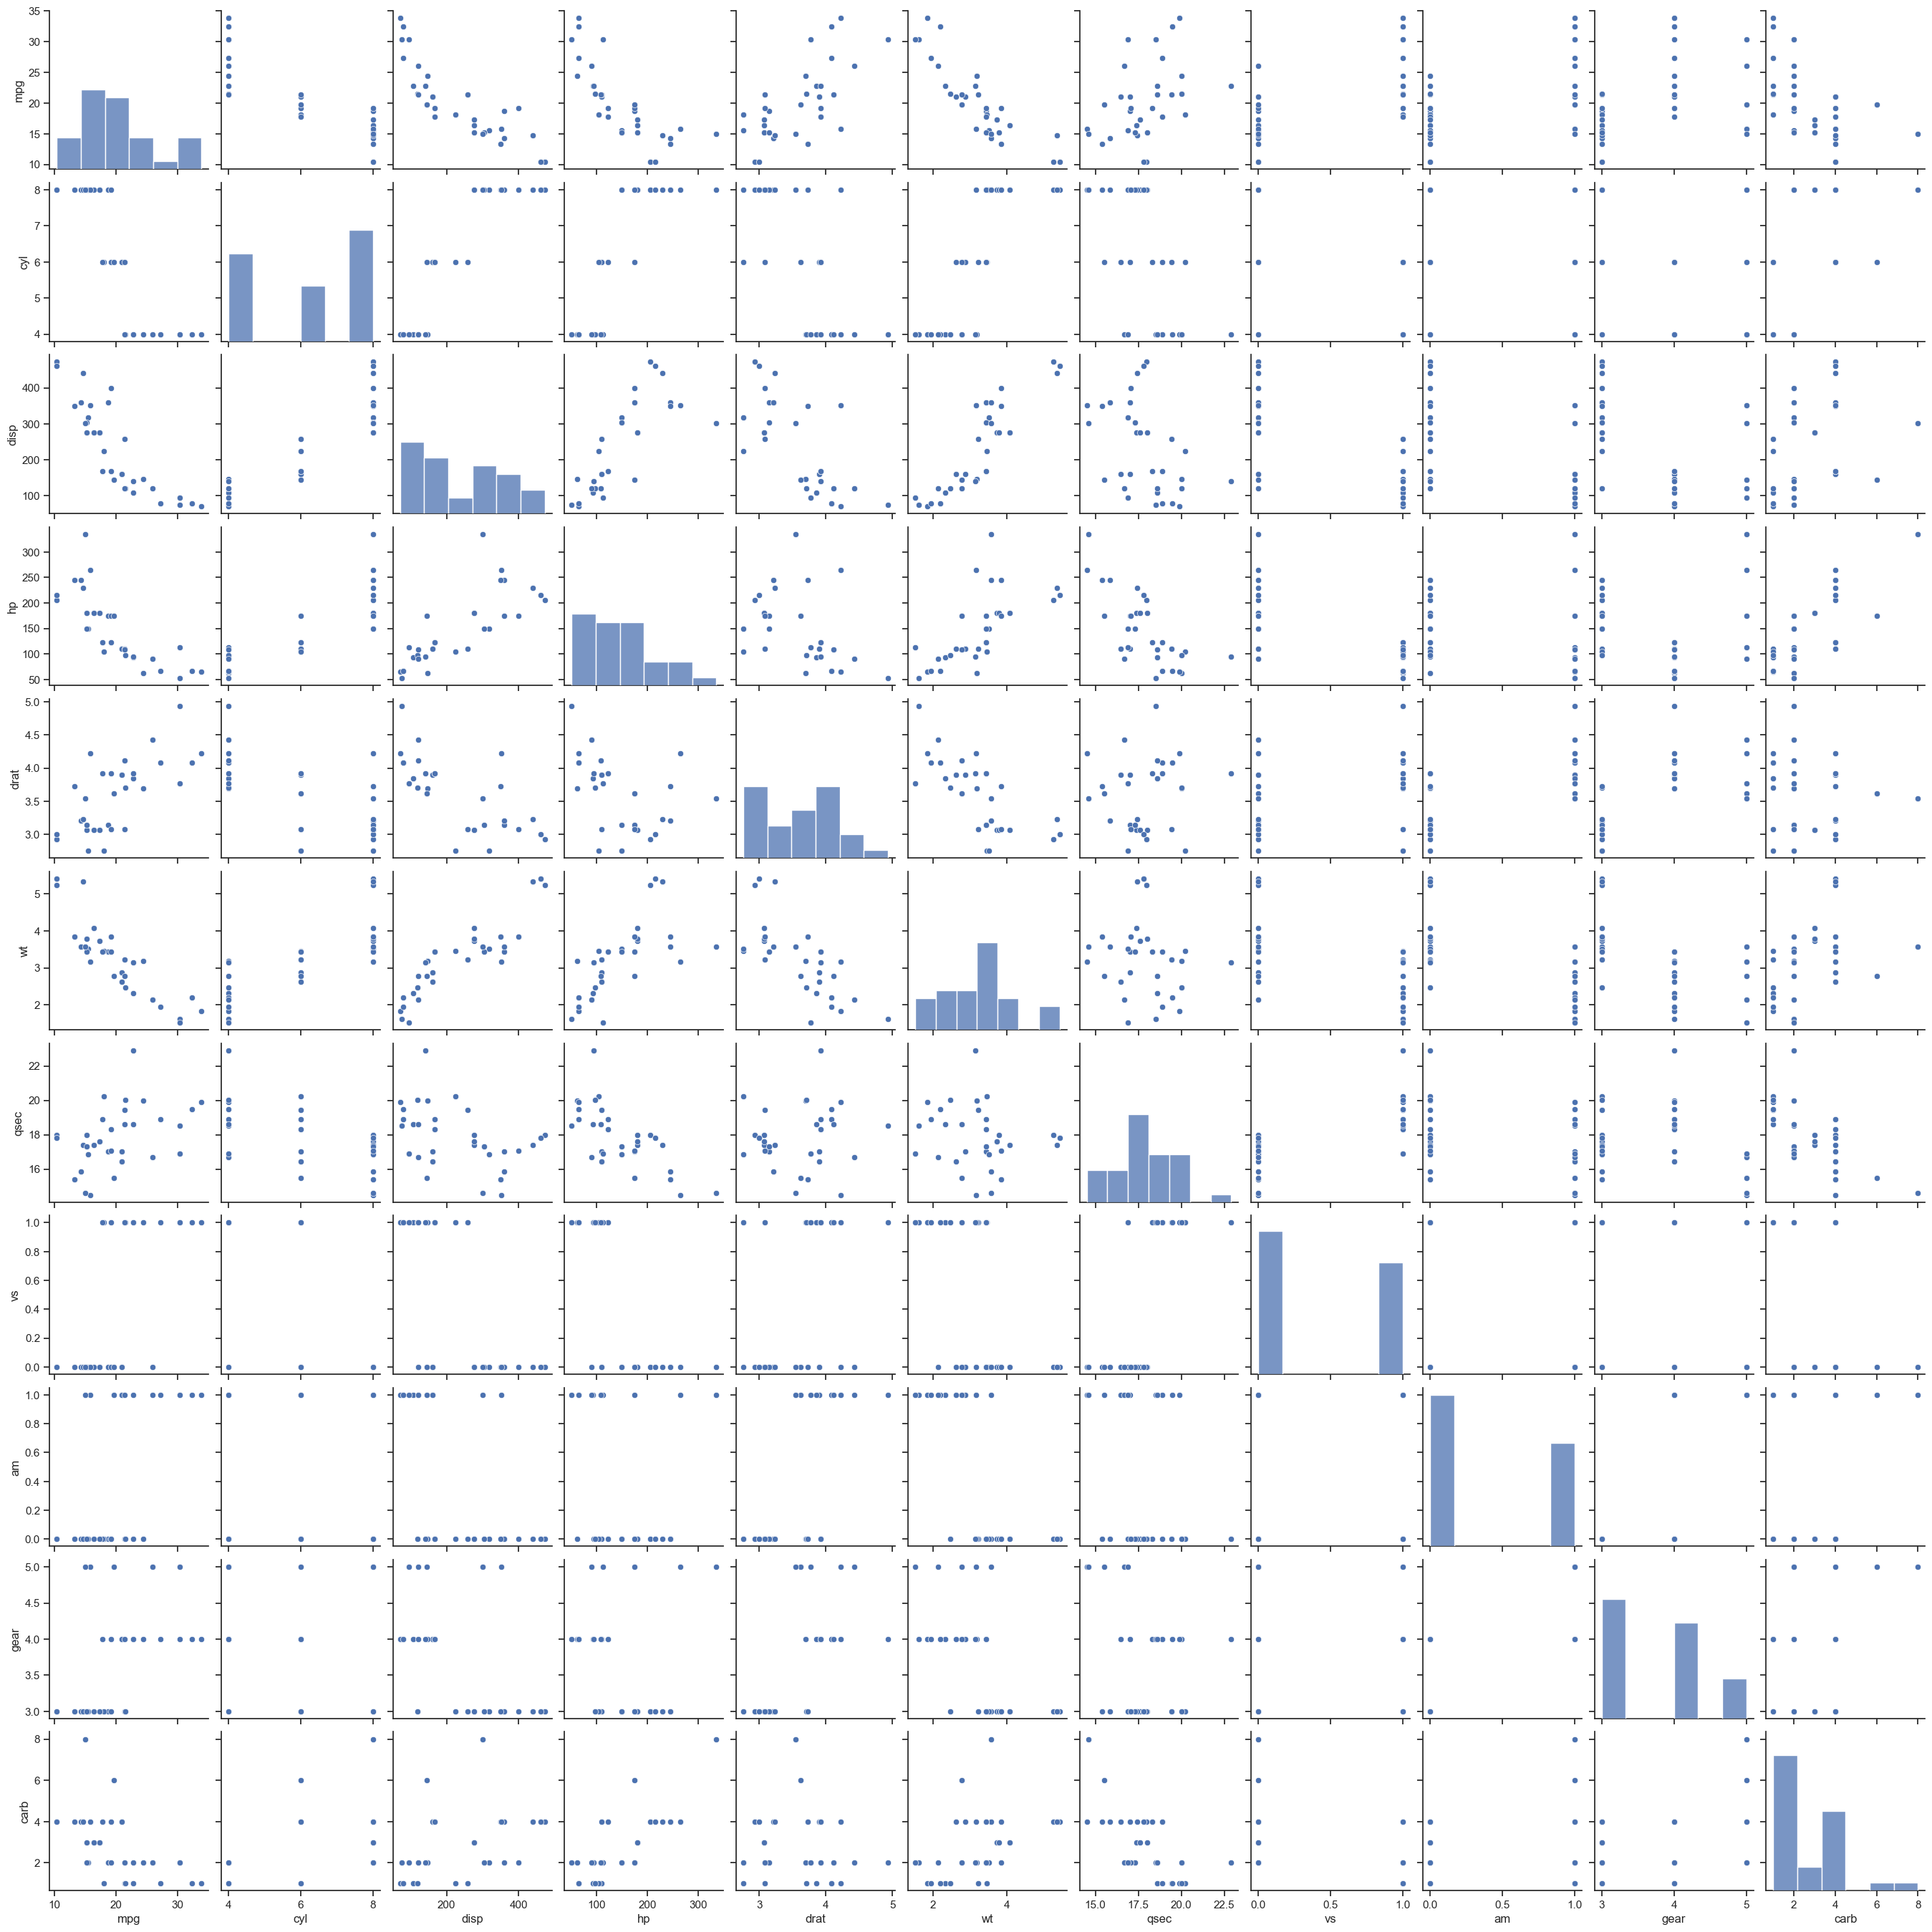

In [21]:
# 산점도 행렬 그려서 변수간 상관관계 확인
sns.set(style='ticks')
sns.pairplot(df1)

In [41]:
# statsmodels 패키지 설치
!pip install statsmodels
import statsmodels.api as sm

# mpg 와 상관관계가 발견된 변수를 뽑아 회귀분석 준비
Y = df1['mpg']
x_cols = ['disp', 'hp', 'drat', 'wt', 'qsec', 'carb']
X = df1[x_cols]
X = sm.add_constant(X)
X.head(3)


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,const,disp,hp,drat,wt,qsec,carb
Mazda RX4,1.0,160.0,110,3.90,2.620,16.46,4
Mazda RX4 Wag,1.0,160.0,110,3.90,2.875,17.02,4
Datsun 710,1.0,108.0,93,3.85,2.320,18.61,1


In [42]:
# 회귀분석
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     23.41
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.98e-09
Time:                        18:57:51   Log-Likelihood:                -72.139
No. Observations:                  32   AIC:                             158.3
Df Residuals:                      25   BIC:                             168.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6130     11.576      1.435      0.1

- 적합된 회귀식 mpg = 16.613 + 0.084disp - 0.0202hp + 2.0259drat - 4.3514wt + 0.6318qsec - 0.0193carb
- F통계량의 p-값은 3.98e-09 로, 0.05보다 작으며 매우 작은 값이 나왔으므로 위 회귀모형은 통계적으로 매우 유의하다.
- 수정된 결정계수는 0.813 으로, 위 회귀모형은 81.3%의 설명력을 갖는다.
- 자동차 마일리지(mpg)는 배수량(disp), 후방차축비율(drat), 쿼터마일타임(qsec) 과 양의 상관관계를, 총 마력(hp), 중량(wt), 기화기 수(carb) 와는 음의 상관관계를 갖는다.
- 그러나, 각 설명변수의 p-값을 살펴보면 중랑(wt)을 제외하면 모두 0.05보다 큰 값이 나왔으므로, 통계적으로 유의한 회귀계수는 wt 하나이다.
- 조건수가 매우 큰 값이 나왔으므로, 설명번수들 사이의 상관관계가 크고 회귀식이 불안정하다는 것을 확인할 수 있다. 다중공선성이 의심된다.

#### 워크북 5. health 데이터객체에서 변수 time을 반응변수로 한 회귀모형을 적합

In [ ]:
import pandas as pd
import statsmodels.api as sm
health = pd.read_csv("c:/data/rpy/health.csv")
X_cols = ['weight', 'pulse', 'muscle', 'quarter']
X = health[X_cols]
X = sm.add_constant(X)
Y = health['time']
model = sm.OLS(Y, X)